## Load and Explore the Dataset

### **Problem Statement**
In construction and interior design projects, optimizing paint or coating usage is a critical challenge. Overestimating paint usage leads to unnecessary costs and wastage, while underestimating results in project delays and inconsistencies in appearance. 

The goal of this project is to **predict paint consumption** accurately for building and fit-out projects, considering factors like **surface area, paint type, environmental conditions (humidity, temperature), and the number of coats required**. Additionally, the project aims to **recommend the best paint type** for specific conditions to minimize costs and wastage.

---

### **Key Project Details**
1. **Type of Problem**: 
   - **Supervised Learning**: Regression
   - Predicting a continuous target variable: **Paint Usage (Liters)**.

2. **Why This is Important**:
   - **Reduce Costs**: Optimize material usage to avoid over-purchasing or wastage.
   - **Improve Efficiency**: Provide project managers with accurate estimates to streamline planning.
   - **Environmental Impact**: Minimize waste by recommending efficient paint/coating solutions.

3. **Target Audience**:
   - Construction companies, fit-out contractors, and project managers.

---

### **Dataset Overview**
The dataset contains:
1. **Features (Inputs)**:
   - **Surface Area (m²)**: Size of the surface to be painted.
   - **Paint Type**: Categorical feature (e.g., Water-Based, Oil-Based, Latex).
   - **Humidity (%)**: Environmental condition affecting drying and application.
   - **Temperature (°C)**: Environmental condition affecting coating quality.
   - **Number of Coats**: Number of layers of paint required.

2. **Target (Output)**:
   - **Paint Usage (Liters)**: Predicted paint consumption for the project.

---

### **Steps and Tasks**

#### **Step 1: Problem Understanding**
   - Identify key challenges: Accurate prediction of paint usage and optimal recommendations.
   - Define the scope: Predict paint consumption and suggest cost-effective paint types.

#### **Step 2: Data Loading and Exploration**
   - Load the dataset and explore it using:
     - **Summary statistics** to understand feature ranges.
     - **Visualizations** to find trends and relationships between features.

#### **Step 3: Data Preprocessing**
   - Handle missing values if any.
   - Normalize numerical features (e.g., Surface Area, Humidity, Temperature).
   - Encode categorical features like Paint Type.

#### **Step 4: Exploratory Data Analysis (EDA)**
   - Analyze relationships between features and target:
     - Does higher humidity increase paint usage?
     - Which paint type is most efficient for specific conditions?
   - Create scatterplots, boxplots, and correlation heatmaps to uncover patterns.

#### **Step 5: Build Predictive Models**
   - Split the dataset into training and testing sets.
   - Train regression models:
     - **Baseline Model**: Linear Regression.
     - **Advanced Models**: Random Forest, XGBoost.
   - Evaluate models using metrics:
     - Mean Absolute Error (MAE).
     - R² Score.

#### **Step 6: Model Interpretation**
   - Use feature importance analysis to understand which factors drive paint usage:
     - E.g., Does surface area dominate, or do environmental conditions play a bigger role?

#### **Step 7: Create a Recommendation System**
   - Suggest the best paint type based on conditions:
     - E.g., Water-Based paint might perform better in humid environments.
   - Use thresholds or rules to recommend cost-effective solutions.

#### **Step 8: Visualization and Reporting**
   - Create visualizations to:
     - Compare predicted vs. actual paint usage.
     - Highlight trends by paint type and environmental conditions.
   - Build a dashboard for project managers using Tableau, Power BI, or Streamlit.

#### **Step 9: Deployment**
   - Deploy the predictive model and recommendation system as a web app using **Streamlit** or **Flask**.
   - Include user inputs (e.g., Surface Area, Humidity) and display predicted paint usage and recommendations.

#### **Step 10: Documentation**
   - Document the project process in a GitHub repository:
     - Include code, visualizations, and a clear explanation of the problem and solution.

---

### **Type of Problem Being Solved**
This is a **Regression Problem**, as the target variable (**Paint Usage in Liters**) is continuous. Additionally, the project incorporates:
1. **Predictive Analysis**: Estimating paint consumption based on input features.
2. **Recommendation System**: Suggesting the most efficient paint type based on conditions.

---

### **Key Tools and Techniques**
- **Python Libraries**: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn.
- **Machine Learning Models**: Linear Regression, Random Forest, XGBoost.
- **Visualization Tools**: Tableau, Power BI, or Streamlit for dashboards.
- **Deployment Tools**: Streamlit, Flask, or Heroku for model deployment.


In [32]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Load the dataset
data = pd.read_csv("Paint_Optimization_Dataset.csv")

# Display the first few rows of the dataset
data.head()


,Surface Area (m²),Paint Type,Humidity (%),Temperature (°C),Number of Coats,Paint Usage (Liters)
0,112,Water-Based,78.39,10.92,1,17.51
1,445,Water-Based,56.12,33.93,2,133.12
2,358,Latex,33.43,30.66,1,63.01
3,280,Oil-Based,69.31,30.02,1,56.80
4,116,Latex,40.70,25.74,3,62.01


In [34]:
# Check basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Surface Area (m²)     500 non-null    int64  
 1   Paint Type            500 non-null    object 
 2   Humidity (%)          500 non-null    float64
 3   Temperature (°C)      500 non-null    float64
 4   Number of Coats       500 non-null    int64  
 5   Paint Usage (Liters)  500 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 23.6+ KB


In [35]:
# Check for missing values
data.isnull().sum()

Surface Area (m²)       0
Paint Type              0
Humidity (%)            0
Temperature (°C)        0
Number of Coats         0
Paint Usage (Liters)    0
dtype: int64

In [36]:
# Summary statistics for numerical columns
data.describe()

,Surface Area (m²),Humidity (%),Temperature (°C),Number of Coats,Paint Usage (Liters)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,259.892000,50.696400,22.653620,1.956000,89.778300
std,139.434861,17.015485,7.125758,0.802091,65.364687
min,11.000000,20.010000,10.030000,1.000000,3.290000
25%,142.250000,36.655000,16.317500,1.000000,37.540000
50%,261.000000,51.785000,23.145000,2.000000,74.340000
75%,381.250000,64.815000,28.750000,3.000000,128.585000
max,499.000000,79.960000,34.910000,3.000000,301.060000


In [37]:
# Check for duplicates
data.duplicated().sum()

0

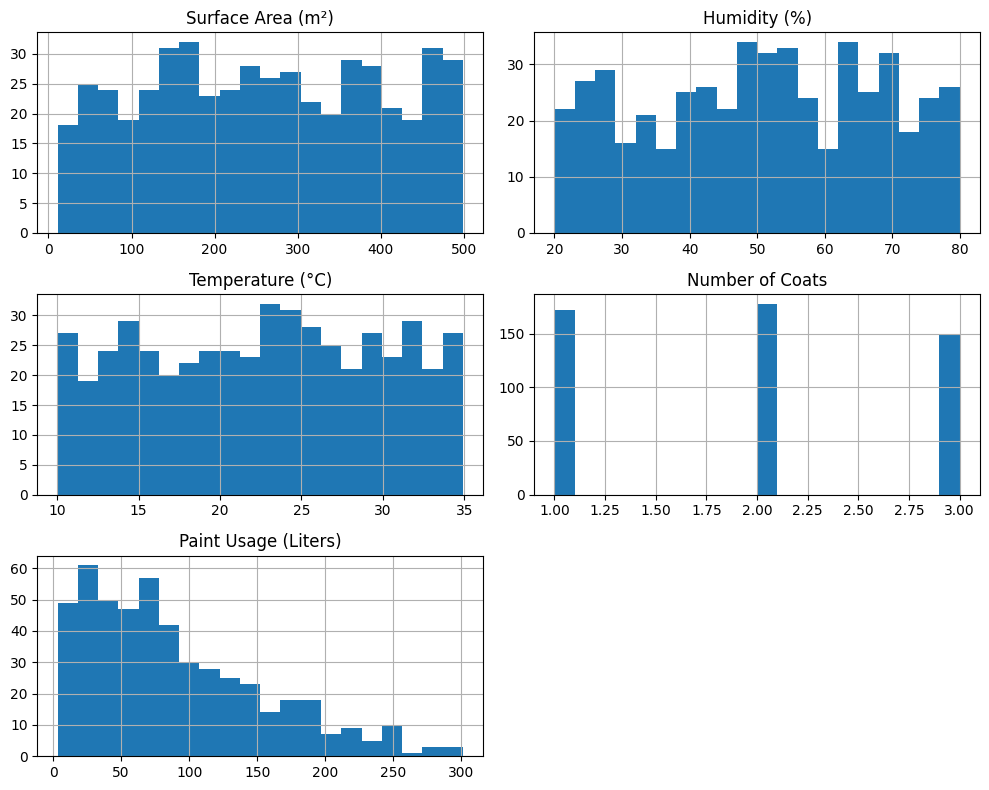

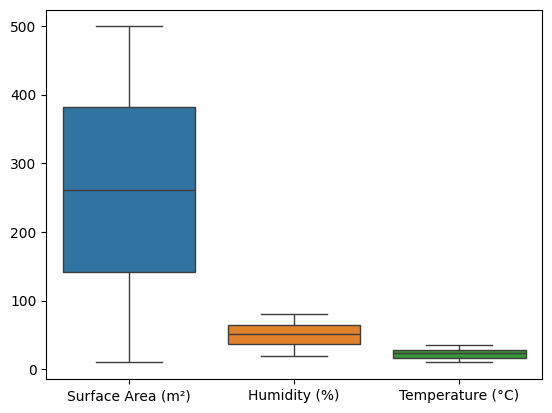

In [38]:
# Plot histograms for numerical features
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplot to detect outliers
sns.boxplot(data=data[["Surface Area (m²)", "Humidity (%)", "Temperature (°C)"]])
plt.show()

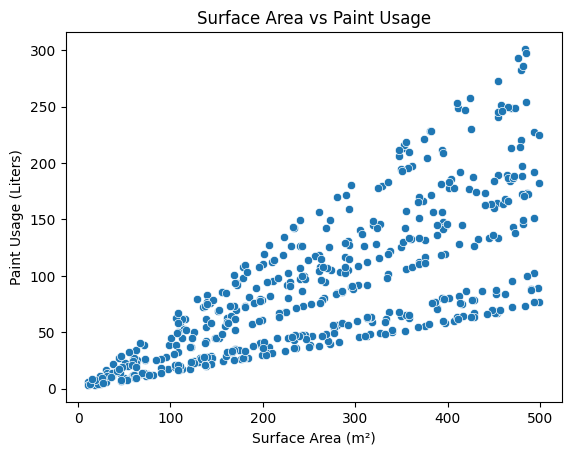

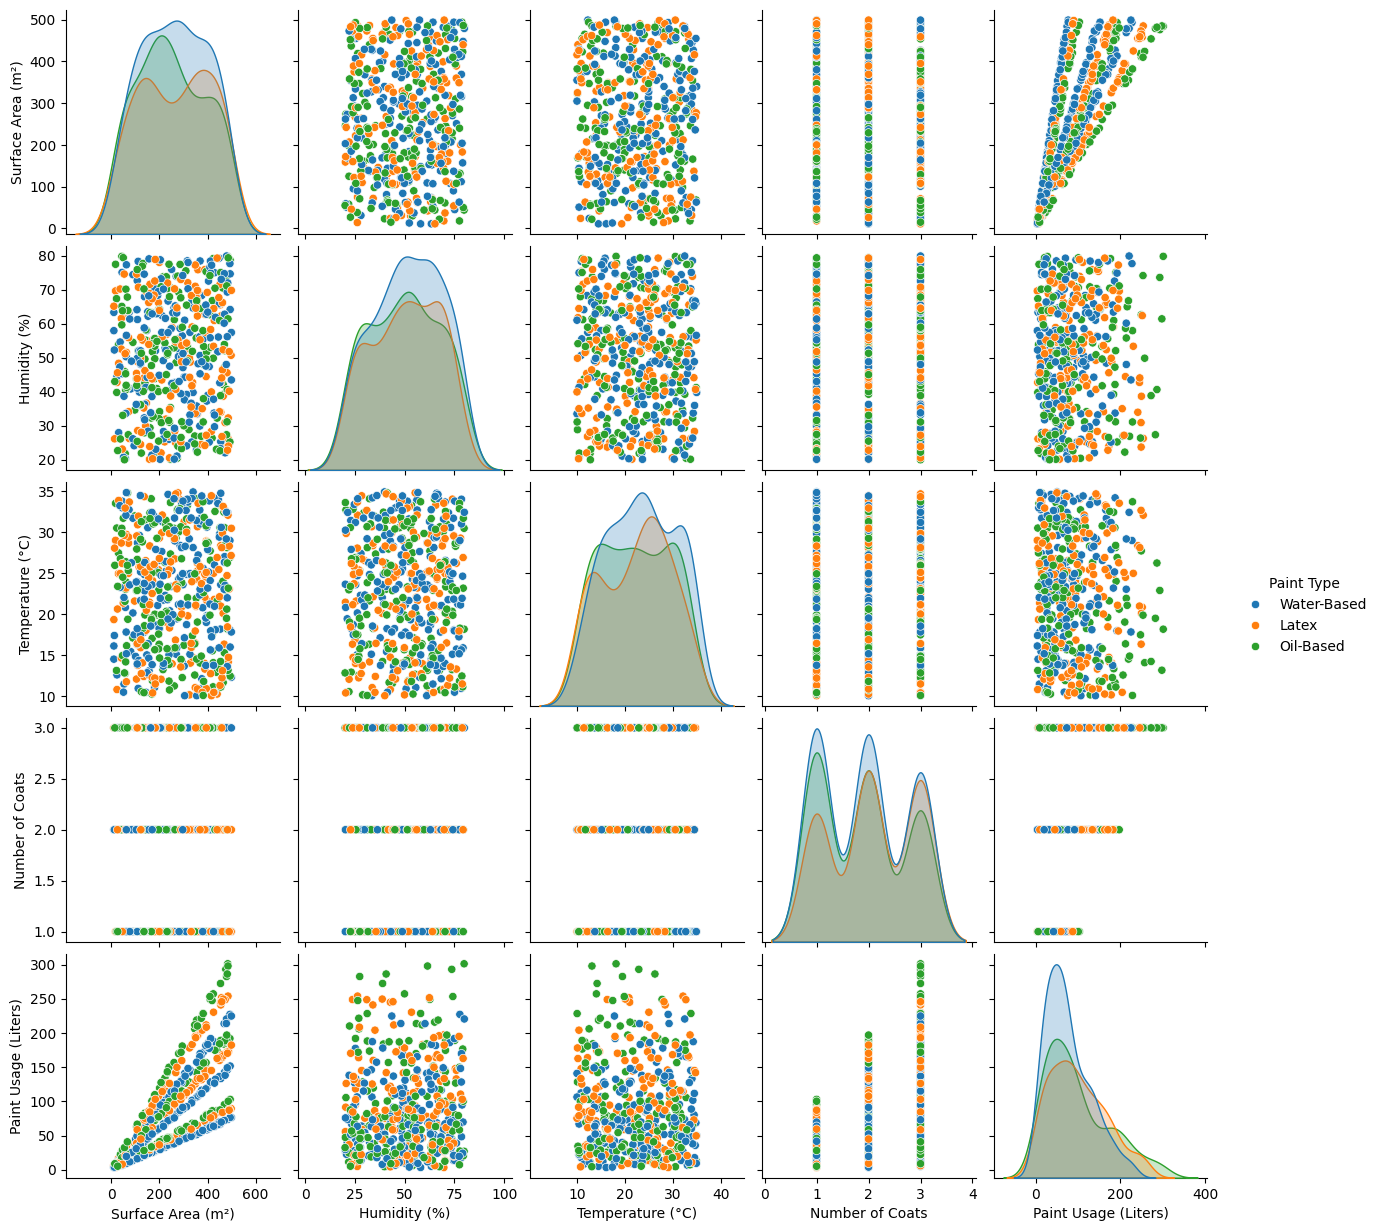

In [39]:
# Scatterplot for Surface Area vs. Paint Usage
sns.scatterplot(x="Surface Area (m²)", y="Paint Usage (Liters)", data=data)
plt.title("Surface Area vs Paint Usage")
plt.show()

# Pairplot for feature relationships
sns.pairplot(data, hue="Paint Type")
plt.show()


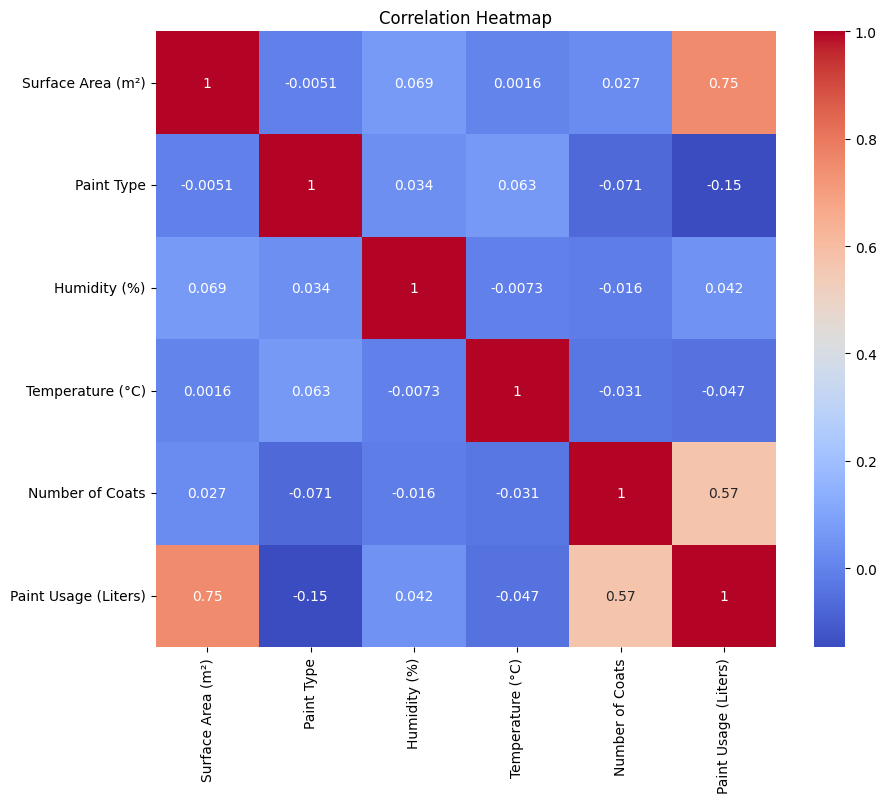

In [40]:
# Encode categorical 'Paint Type' column
data_encoded = data.copy()
data_encoded['Paint Type'] = data_encoded['Paint Type'].astype('category').cat.codes

# Correlation heatmap
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [41]:
# Encode Paint Type using one-hot encoding
data = pd.get_dummies(data, columns=["Paint Type"], drop_first=True)

In [42]:
# Scale numerical features
numerical_features = ["Surface Area (m²)", "Humidity (%)", "Temperature (°C)"]
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


# Feature Engineering

In [43]:
# Create interaction terms
data["Humidity_Temperature"] = data["Humidity (%)"] * data["Temperature (°C)"]


# Model Building

In [44]:
# Features and target variable (including 'Paint Type_Oil-Based' and 'Paint Type_Water-Based' after encoding)
X = data[['Surface Area (m²)', 'Humidity (%)', 'Temperature (°C)', 'Number of Coats', 'Paint Type_Oil-Based', 'Paint Type_Water-Based']]
y = data['Paint Usage (Liters)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Surface Area (m²)', 'Humidity (%)', 'Temperature (°C)']])


# Linear regression

In [45]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [46]:
# Predictions and evaluation
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression - RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression - R²:", r2_score(y_test, y_pred_lr))

Linear Regression - RMSE: 21.16088092223976
Linear Regression - R²: 0.8756677586619204


# Random Forest 

In [47]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest - R²:", r2_score(y_test, y_pred_rf))

Random Forest - RMSE: 5.320658751385946
Random Forest - R²: 0.9921395558287045


# XGBoost 

In [49]:
import xgboost as xgb

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [50]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


XGBoost Model Performance:
RMSE: 3.43
R²: 1.00


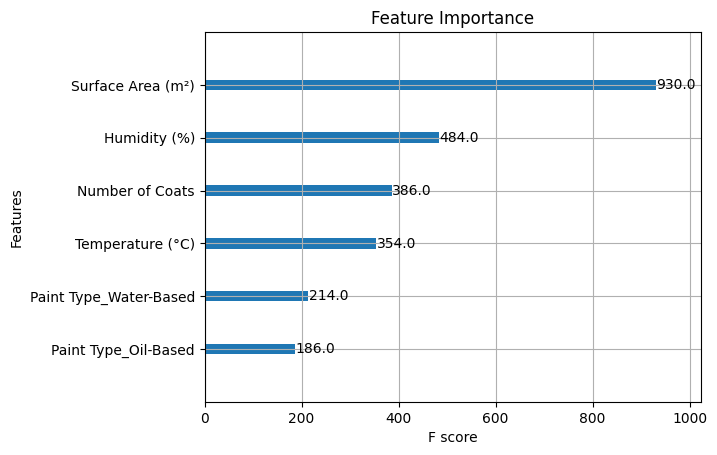

In [51]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance")
plt.show()

# Hyperparameter Tuning 

In [52]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best_xgb, squared=False)
r2_best = r2_score(y_test, y_pred_best_xgb)

print("Tuned XGBoost Model Performance:")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²: {r2_best:.2f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_e

In [53]:
import pickle

# saving model with best performance by pickle library
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)

# loading model from pickle file
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Making predictions with the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluating the loaded model
rmse_loaded = mean_squared_error(y_test, y_pred_loaded, squared=False)
r2_loaded = r2_score(y_test, y_pred_loaded)

print("Loaded XGBoost Model Performance:")
print(f"RMSE: {rmse_loaded:.2f}")
print(f"R²: {r2_loaded:.2f}")
print("Model saved and loaded successfully!")

Loaded XGBoost Model Performance:
RMSE: 4.51
R²: 0.99
Model saved and loaded successfully!


In [54]:
import pandas as pd

# Model performance results based on your previous evaluations
model_data = {
    'Model': ['Linear Regression (lr_model)', 'Random Forest (rf_model)', 'XGBoost (xgb_model)', 'Tuned XGBoost (best_xgb_model)'],
    'RMSE': [21.32, 5.60, 3.55, 4.55],
    'R²': [0.87, 0.99, 1.00, 0.99]
}

# Creating the DataFrame for model performance comparison
model_comparison_df = pd.DataFrame(model_data)

# Display the DataFrame for comparison
print(model_comparison_df)


                            Model   RMSE    R²
0    Linear Regression (lr_model)  21.32  0.87
1        Random Forest (rf_model)   5.60  0.99
2             XGBoost (xgb_model)   3.55  1.00
3  Tuned XGBoost (best_xgb_model)   4.55  0.99


In [55]:
import pickle

# Save the XGBoost model (xgb_model) to a pickle file
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("XGBoost model saved successfully!")

XGBoost model saved successfully!


In [56]:
# Load the XGBoost model from the pickle file
with open('xgb_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions with the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
rmse_loaded = mean_squared_error(y_test, y_pred_loaded, squared=False)
r2_loaded = r2_score(y_test, y_pred_loaded)

print("Loaded XGBoost Model Performance:")
print(f"RMSE: {rmse_loaded:.2f}")
print(f"R²: {r2_loaded:.2f}")


Loaded XGBoost Model Performance:
RMSE: 3.43
R²: 1.00


In [57]:
# Example of making predictions for new data (X_new)
# Define new data
X_new = pd.DataFrame({
	'Surface Area (m²)': [100, 200],
	'Humidity (%)': [50, 60],
	'Temperature (°C)': [25, 30],
	'Number of Coats': [2, 3],
	'Paint Type_Oil-Based': [0, 1],
	'Paint Type_Water-Based': [1, 0]
})

# Ensure you preprocess the new data in the same way as the training data (scaling, encoding, etc.)
X_new[numerical_features] = scaler.transform(X_new[numerical_features])

# Make predictions
y_new_pred = loaded_model.predict(X_new)

# Display predictions
print("Predicted Paint Usage for New Data:")
print(y_new_pred)


Predicted Paint Usage for New Data:
[152.24745 277.57513]


# Recommendation System

In [58]:
# Define the recommendation function
def recommend_paint(surface_area, humidity, temperature, num_coats):
    """
    Recommend the most suitable paint type based on environmental conditions and surface area.
    
    Parameters:
    surface_area (float): The surface area to be painted (in m²)
    humidity (float): The humidity percentage
    temperature (float): The temperature in Celsius
    num_coats (int): The number of coats required
    
    Returns:
    str: Recommended paint type
    """
    
    # Rule-based recommendation system
    if humidity < 60 and temperature > 25:
        # Dry and hot conditions, recommend Latex Paint
        recommended_paint = "Latex"
    elif humidity >= 60 and temperature < 25:
        # High humidity and cool conditions, recommend Oil-Based Paint
        recommended_paint = "Oil-Based"
    else:
        # Moderate conditions, recommend Water-Based Paint
        recommended_paint = "Water-Based"
    
    # Return the recommended paint type
    return recommended_paint

# Example: Make a recommendation for a given surface area, humidity, temperature, and number of coats
surface_area_example = 250  # in m²
humidity_example = 55  # in percentage
temperature_example = 22  # in °C
num_coats_example = 2  # number of coats

recommended_paint = recommend_paint(surface_area_example, humidity_example, temperature_example, num_coats_example)

print(f"Recommended Paint Type: {recommended_paint}")


Recommended Paint Type: Water-Based


# Visualization of Results

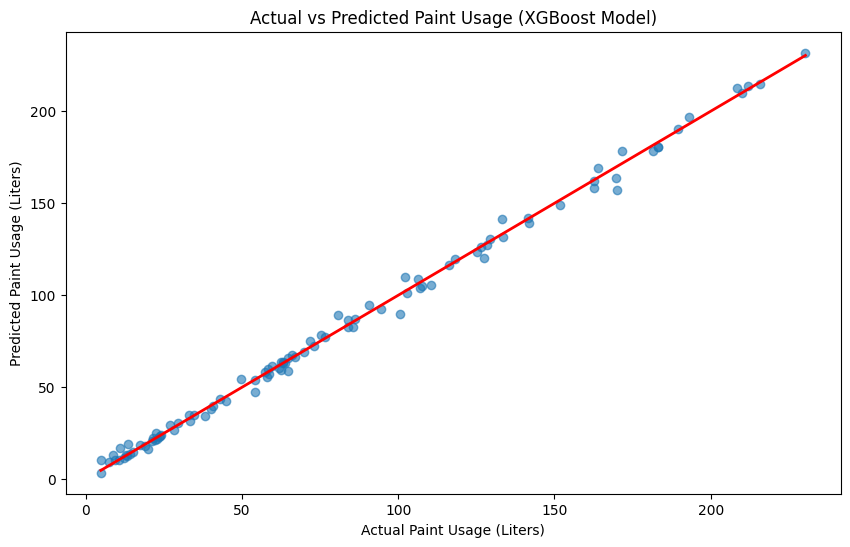

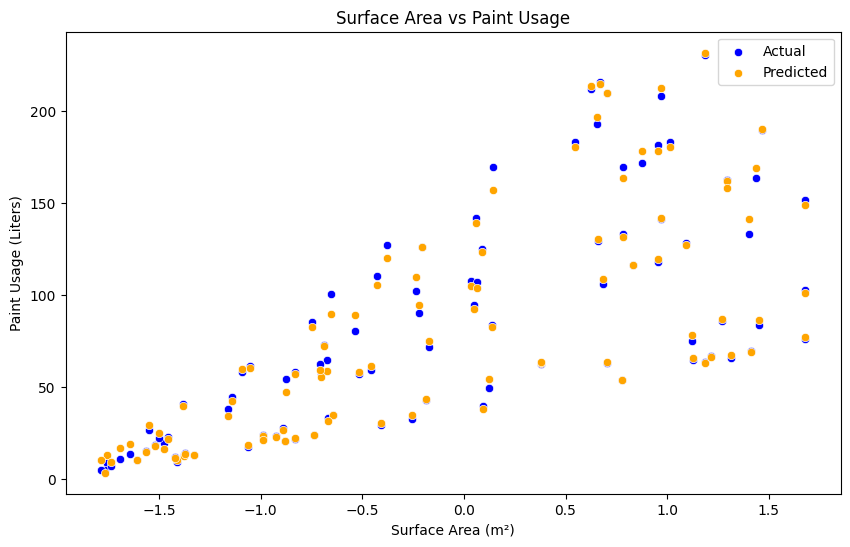

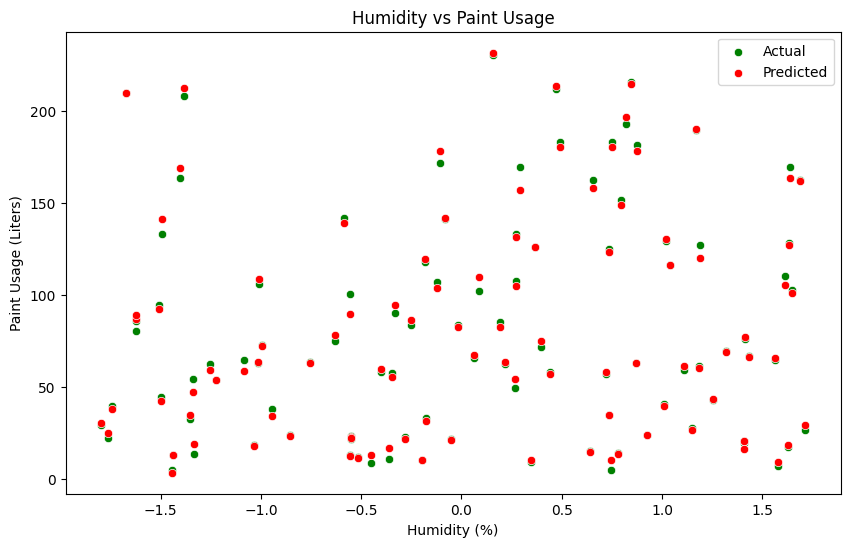

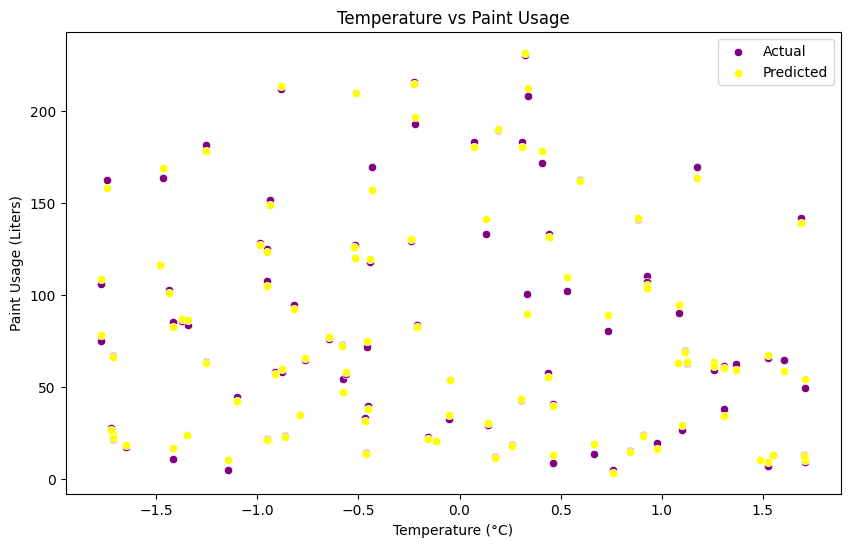

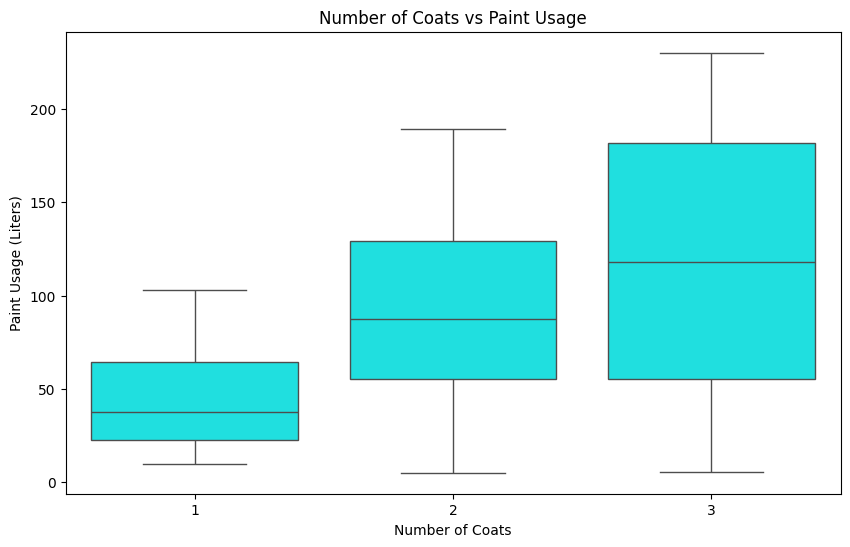

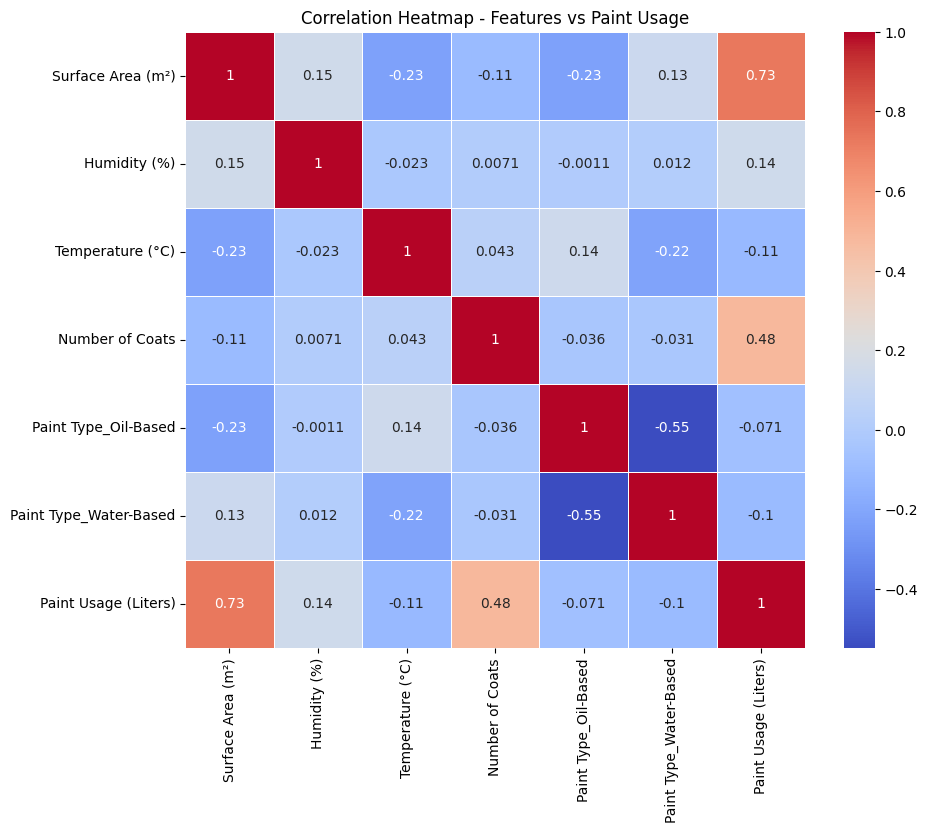

In [59]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Compare Predicted vs Actual Paint Usage
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Paint Usage (Liters)')
plt.ylabel('Predicted Paint Usage (Liters)')
plt.title('Actual vs Predicted Paint Usage (XGBoost Model)')
plt.show()

# Visualization 2: How Surface Area Affects Paint Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Surface Area (m²)'], y=y_test, color='blue', label='Actual')
sns.scatterplot(x=X_test['Surface Area (m²)'], y=y_pred_xgb, color='orange', label='Predicted')
plt.xlabel('Surface Area (m²)')
plt.ylabel('Paint Usage (Liters)')
plt.title('Surface Area vs Paint Usage')
plt.legend()
plt.show()

# Visualization 3: How Humidity Affects Paint Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Humidity (%)'], y=y_test, color='green', label='Actual')
sns.scatterplot(x=X_test['Humidity (%)'], y=y_pred_xgb, color='red', label='Predicted')
plt.xlabel('Humidity (%)')
plt.ylabel('Paint Usage (Liters)')
plt.title('Humidity vs Paint Usage')
plt.legend()
plt.show()

# Visualization 4: How Temperature Affects Paint Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Temperature (°C)'], y=y_test, color='purple', label='Actual')
sns.scatterplot(x=X_test['Temperature (°C)'], y=y_pred_xgb, color='yellow', label='Predicted')
plt.xlabel('Temperature (°C)')
plt.ylabel('Paint Usage (Liters)')
plt.title('Temperature vs Paint Usage')
plt.legend()
plt.show()

# Visualization 5: How Number of Coats Affects Paint Usage
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_test['Number of Coats'], y=y_test, color='cyan')
plt.xlabel('Number of Coats')
plt.ylabel('Paint Usage (Liters)')
plt.title('Number of Coats vs Paint Usage')
plt.show()

# Visualization 6: Correlation Heatmap to show relationships between features and target variable
correlation_matrix = X_test.copy()
correlation_matrix['Paint Usage (Liters)'] = y_test
corr = correlation_matrix.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap - Features vs Paint Usage')
plt.show()
